In [1]:
# The code was removed by Watson Studio for sharing.

## The Battle of the Neighborhoods - Week 2

### Part 3 Download and Explore New York city and its Boroughs Cuisine dataset

#### Download all the dependencies that is need.

In [2]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
from PIL import Image # converting images into arrays

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

# install wordcloud
!conda install -c conda-forge wordcloud==1.4.1 --yes

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Matplotlib version:  2.1.0
Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following NEW packages will be INSTALLED:

    wordcloud: 1.4.1-py35_0 conda-forge

wordcloud-1.4. 100% |################################| Time: 0:00:00   7.56 MB/s
Wordcloud is installed and imported!


This data is extracted from the wikipedia Page - https://en.wikipedia.org/wiki/Cuisine_of_New_York_City

In [3]:
# Fetch the file
my_file = project.get_file("BON3_NYC_CUISINE.csv")

# Read the CSV data file from the object storage into a pandas DataFrame
my_file.seek(0)
import pandas as pd
NYC_CUISINE=pd.read_csv(my_file)
NYC_CUISINE.drop(NYC_CUISINE.columns[[3,4,5,6,7]], axis=1,inplace=True) 
NYC_CUISINE.head()

,Borough,Neighborhood,Cuisine
0,The Bronx,Bedford Park,"Mexican,Puerto Rican,Dominican,Korean"
1,The Bronx,Belmont,"Italian,Albanian"
2,The Bronx,City Island,"Italian,Seafood"
3,The Bronx,Morris Park,"Italian,Albanian"
4,The Bronx,Norwood,Filipino


In [4]:
NYC_CUISINE.shape

(55, 3)

In [5]:
print(NYC_CUISINE.Borough.unique())

['The Bronx' 'Queens' 'Brooklyn' 'Staten Island' 'Manhattan']


In [6]:
NYC_CUISINE['Borough'].value_counts().to_frame()

,Borough
Brooklyn,19
Queens,13
Manhattan,11
The Bronx,9
Staten Island,3


### 1. NEW YORK CITY CUISINE - WORD CLOUD

In [7]:
CUISINE_WC = NYC_CUISINE[['Cuisine']]
CUISINE_WC

,Cuisine
0,"Mexican,Puerto Rican,Dominican,Korean"
1,"Italian,Albanian"
2,"Italian,Seafood"
3,"Italian,Albanian"
4,Filipino
5,Jewish
6,"Puerto Rican, Dominican"
7,"Jamaican, West Indian"
8,Irish
9,"Greek, Italian, Eastern European, Brazilian, E..."


In [8]:
CUISINE_WC.to_csv('CUISINE_WC.txt', sep=',', index=False)

In [9]:
CUISINE_WC1 = open('CUISINE_WC.txt', 'r').read()

Use the stopwords that we imported from `word_cloud`. We use the function *set* to remove any redundant stopwords.

In [10]:
stopwords = set(STOPWORDS)

In [11]:
# instantiate a word cloud object
NYC_CUISINE_WC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
NYC_CUISINE_WC.generate(CUISINE_WC1)

The `word` cloud is created, let's visualize it.

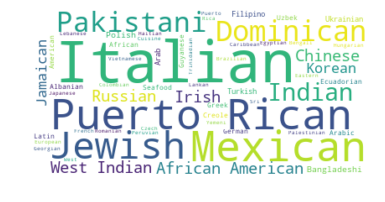

In [12]:
# display the word cloud
plt.imshow(NYC_CUISINE_WC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

Most Preferred Food in New York City -<Br>
1. Italian<Br>
2. Purto Rican<Br>
3. Mexican<Br>
4. Jewish<Br>
5. Indian<Br>
6. Pakistani<Br>
7. Dominican

### BROOKLYN CUISINE - WORD CLOUD

In [13]:
Brooklyn_data = NYC_CUISINE[NYC_CUISINE['Borough'] == 'Brooklyn'].reset_index(drop=True)
Brooklyn_data.head()

,Borough,Neighborhood,Cuisine
0,Brooklyn,Bay Ridge,"Irish, Italian, Greek, Turkish, Lebanese, Pale..."
1,Brooklyn,Bedford-Stuyvesant,"African-American, Jamaican, Trinidadian, Puert..."
2,Brooklyn,Bensonhurst,"Italian, Chinese, Turkish, Russian, Mexican"
3,Brooklyn,Borough Park,"Jewish, Italian, Mexican, Chinese"
4,Brooklyn,Brighton Beach,"Russian, Georgian, Turkish, Pakistani, Ukrainian"


In [14]:
BR_CUISINE_WC = Brooklyn_data[['Cuisine']]
BR_CUISINE_WC

,Cuisine
0,"Irish, Italian, Greek, Turkish, Lebanese, Pale..."
1,"African-American, Jamaican, Trinidadian, Puert..."
2,"Italian, Chinese, Turkish, Russian, Mexican"
3,"Jewish, Italian, Mexican, Chinese"
4,"Russian, Georgian, Turkish, Pakistani, Ukrainian"
5,"Puerto Rican, Mexican, Dominican,Ecuadorian"
6,"Jamaican, West Indian, African-American"
7,Italian
8,"Jamaican, West Indian, Jewish"
9,"African-American, Dominican,Puerto Rican"


In [15]:
BR_CUISINE_WC.to_csv('BR_CUISINE.txt', sep=',', index=False)

In [16]:
BR_CUISINE_WC = open('BR_CUISINE.txt', 'r').read()

In [17]:
stopwords = set(STOPWORDS)

In [18]:
# instantiate a word cloud object
BR_CUISINE_NYC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
BR_CUISINE_NYC.generate(BR_CUISINE_WC)

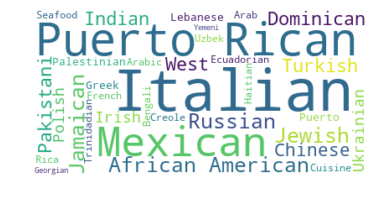

In [19]:
# display the word cloud
plt.imshow(BR_CUISINE_NYC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

Most Preferred Food in Brooklyn is -<Br>
1. Italian<Br>
2. Purto Rican<Br>
3. Mexican<Br>

### QUEENS CUISINE - WORD CLOUD

In [21]:
Queens_data = NYC_CUISINE[NYC_CUISINE['Borough'] == 'Queens'].reset_index(drop=True)
Queens_data.head()

,Borough,Neighborhood,Cuisine
0,Queens,Astoria,"Greek, Italian, Eastern European, Brazilian, E..."
1,Queens,Bellerose,"Indian,Pakistani"
2,Queens,Flushing,"Chinese, Korean"
3,Queens,"Forest Hills, Kew Gardens Hills, Rego Park","Jewish, Russian,Uzbek"
4,Queens,"Howard Beach, Ozone Park",Italian


In [22]:
Q_CUISINE_WC = Queens_data[['Cuisine']]
Q_CUISINE_WC

,Cuisine
0,"Greek, Italian, Eastern European, Brazilian, E..."
1,"Indian,Pakistani"
2,"Chinese, Korean"
3,"Jewish, Russian,Uzbek"
4,Italian
5,"German,Polish"
6,"Indian, Pakistani, Bangladeshi, Colombian, Ecu..."
7,"Bangladeshi, Caribbean, African-American, Afri..."
8,"Arab, Chinese,Italian"
9,"Indian, Guyanese, West Indian, Pakistani, Bang..."


In [23]:
Q_CUISINE_WC.to_csv('Q_CUISINE.txt', sep=',', index=False)

In [24]:
Q_CUISINE_WC = open('Q_CUISINE.txt', 'r').read()

In [25]:
stopwords = set(STOPWORDS)

In [26]:
# instantiate a word cloud object
Q_CUISINE_NYC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
Q_CUISINE_NYC.generate(Q_CUISINE_WC)

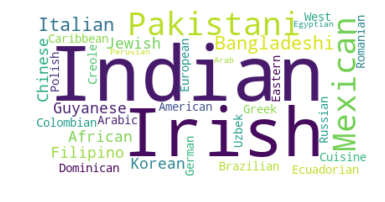

In [27]:
# display the word cloud
plt.imshow(Q_CUISINE_NYC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

Most Preferred Food in Queens is -<Br>
1. Indian<Br>
2. Irish<Br>
3. Pakistani<Br>
4. Mexican

### MANHATTAN CUISINE - WORD CLOUD

In [29]:
Manhattan_data = NYC_CUISINE[NYC_CUISINE['Borough'] == 'Manhattan'].reset_index(drop=True)
Manhattan_data.head()

,Borough,Neighborhood,Cuisine
0,Manhattan,Chinatown,"Chinese,Vietnamese"
1,Manhattan,East Harlem,"Puerto Rican, Mexican, Dominican,Italian"
2,Manhattan,East Village,"Japanese, Korean, Indian , Ukrainian"
3,Manhattan,Greenwich Village,Italian
4,Manhattan,Harlem,"Italian, African-American, Latin American, Wes..."


In [30]:
MN_CUISINE_WC = Manhattan_data[['Cuisine']]
MN_CUISINE_WC

,Cuisine
0,"Chinese,Vietnamese"
1,"Puerto Rican, Mexican, Dominican,Italian"
2,"Japanese, Korean, Indian , Ukrainian"
3,Italian
4,"Italian, African-American, Latin American, Wes..."
5,Korean
6,Italian
7,"Puerto Rican, Jewish, Italian, Latin American"
8,"Indian, Pakistani , Bangladeshi"
9,"Dominican, Puerto Rican, Italian , Jewish"


In [31]:
MN_CUISINE_WC.to_csv('MN_CUISINE.txt', sep=',', index=False)

In [32]:
MN_CUISINE_WC = open('MN_CUISINE.txt', 'r').read()

In [33]:
stopwords = set(STOPWORDS)

In [34]:
# instantiate a word cloud object
MN_CUISINE_NYC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
MN_CUISINE_NYC.generate(MN_CUISINE_WC)

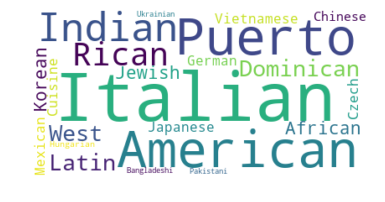

In [35]:
# display the word cloud
plt.imshow(MN_CUISINE_NYC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

Most Preferred Food in Manhattan is -<Br>
1. Italian<Br>
2. American<Br>
3. Puerto Rican<Br>
4. Indian

### THE BRONX CUISINE - WORD CLOUD

In [37]:
Bronx_data = NYC_CUISINE[NYC_CUISINE['Borough'] == 'The Bronx'].reset_index(drop=True)
Bronx_data.head()

,Borough,Neighborhood,Cuisine
0,The Bronx,Bedford Park,"Mexican,Puerto Rican,Dominican,Korean"
1,The Bronx,Belmont,"Italian,Albanian"
2,The Bronx,City Island,"Italian,Seafood"
3,The Bronx,Morris Park,"Italian,Albanian"
4,The Bronx,Norwood,Filipino


In [38]:
BX_CUISINE_WC = Bronx_data[['Cuisine']]
BX_CUISINE_WC

,Cuisine
0,"Mexican,Puerto Rican,Dominican,Korean"
1,"Italian,Albanian"
2,"Italian,Seafood"
3,"Italian,Albanian"
4,Filipino
5,Jewish
6,"Puerto Rican, Dominican"
7,"Jamaican, West Indian"
8,Irish


In [39]:
BX_CUISINE_WC.to_csv('BX_CUISINE.txt', sep=',', index=False)

In [40]:
BX_CUISINE_WC = open('BX_CUISINE.txt', 'r').read()

In [41]:
stopwords = set(STOPWORDS)

In [42]:
# instantiate a word cloud object
BX_CUISINE_NYC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
BX_CUISINE_NYC.generate(BX_CUISINE_WC)

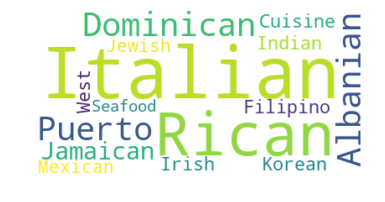

In [43]:
# display the word cloud
plt.imshow(BX_CUISINE_NYC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

Most Preferred Food in The Bronx is - <Br>
1. Italian<Br>
2. Puerto Rican<Br>
3. Albanian<Br>
4. Dominican